<a href="https://colab.research.google.com/github/Saket0303/Housing_prices_prediction/blob/main/banglore_housing_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
from google.colab import files


uploaded = files.upload()


Saving banglore_housing_prices.txt to banglore_housing_prices (1).txt


In [42]:
import io
df = pd.read_csv(io.BytesIO(uploaded['banglore_housing_prices.txt']))
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [43]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [44]:
scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [45]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [46]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [47]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [48]:
# price = w1 * area + w2 * bedrooms + bias

In [64]:
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):

  total_samples = x.shape[0]
  number_of_features = x.shape[1]

  w = np.ones(shape = (number_of_features))
  b = 0

  cost_list = []
  epoch_list = []

  for i in range(epochs):
      y_predicted = np.dot(w, x.T) + b

      w_grad = -(2 / total_samples) * (x.T.dot(y_true - y_predicted))
      b_grad = -(2 / total_samples) * (np.sum(y_true - y_predicted))

      w = w - learning_rate * w_grad
      b = b - learning_rate * b_grad

      cost = np.mean(np.square(y_true - y_predicted))

      if i % 10 == 0:
        cost_list.append(cost)
        epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list

In [65]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

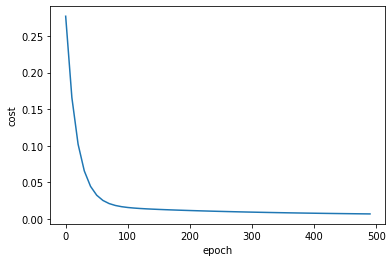

In [66]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [67]:
def predict(area, bedrooms, w, b):

  scaled_x = sx.transform([[area, bedrooms]])[0]

  scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b

  return sy.inverse_transform([[scaled_price]])[0][0]

In [68]:
predict(2600, 4, w, b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.45484403267596

In [69]:
predict(1000,2,w,b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


30.253094462442355

In [70]:
predict(1500,3,w,b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


69.47860785714694

In [71]:
import random

In [72]:
def stochastic_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
  total_samples = x.shape[0]
  number_of_features = x.shape[1]

  w = np.ones(shape = (number_of_features))
  b = 0

  cost_list = []
  epoch_list = []

  for i in range(epochs):
      random_index = random.randint(0, total_samples - 1)
      sample_x = x[random_index]
      sample_y = y_true[random_index]

      y_predicted = np.dot(w, sample_x.T) + b

      w_grad = -(2 / total_samples) * (sample_x.T.dot(sample_y - y_predicted))
      b_grad = -(2 / total_samples) * (sample_y - y_predicted)

      w = w - learning_rate * w_grad
      b = b - learning_rate * b_grad

      cost = np.mean(np.square(sample_y - y_predicted))

      if i % 10 == 0:
        cost_list.append(cost)
        epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list

In [73]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.71142258, 0.67723756]), -0.23107426314193732, 0.005245622779119737)

In [74]:
w, b

(array([0.70712464, 0.67456527]), -0.23034857438407427)

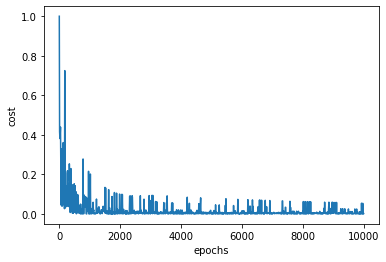

In [75]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [76]:
predict(2600,4,w_sgd, b_sgd)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.98758342032417

In [77]:
predict(1000,2,w_sgd, b_sgd)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


30.28533178710489

In [78]:
predict(1500,3,w_sgd, b_sgd)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


69.70107335104292

In [79]:
def mini_batch_gradient_descent(x, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
  total_samples = x.shape[0]
  number_of_features = x.shape[1]

  w = np.ones(shape = (number_of_features))
  b = 0

  cost_list = []
  epoch_list = []

  if batch_size > total_samples:
    batch_size = total_samples
  
  num_batches = int(total_samples / batch_size)

  for i in range(epochs):
      random_indices = np.random.permutation(total_samples)
      x_tmp = x[random_indices]
      y_tmp = y_true[random_indices]

      for j in range(0,total_samples,batch_size):
        xj = x_tmp[j : j + batch_size]
        yj = y_tmp[j : j + batch_size]
        y_predicted = np.dot(w,xj.T) + b

        w_grad = -(2/len(xj))*(xj.T.dot(yj-y_predicted))
        b_grad = -(2/len(xj))*np.sum(yj-y_predicted)
            
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(yj- y_predicted))

      if i % 10 == 0:
        cost_list.append(cost)
        epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list

In [80]:
w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

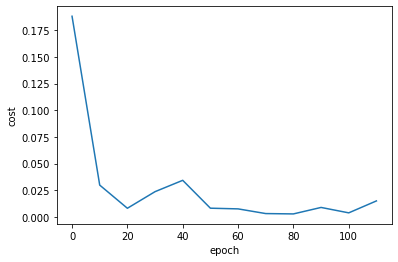

In [81]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbgd,cost_list_mbgd)

In [82]:
predict(2600,4,w_mbgd,b_mbgd)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.6152513571665